<a href="https://colab.research.google.com/github/Jon-Bernt/Machine-learning-training/blob/master/First_machine_learning_project_with_tensorflow_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.models import Sequential
tf.compat.v1.one_hot
from tensorflow.examples.tutorials.mnist import input_data

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


%matplotlib inline
np.random.seed()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


y = 5


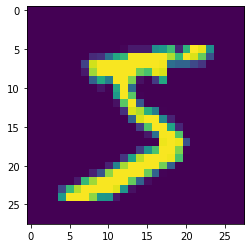

In [0]:
#example of a picture with corresponding lable
index = 0
plt.imshow(x_train[index])
print ("y = " + str(y_train[0]))

In [0]:
## Flatten the training and test images
X_train_flatten = x_train.reshape(x_train.shape[0], -1).T
X_test_flatten = x_test.reshape(x_test.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = tf.one_hot(y_train, 10)
Y_test = tf.one_hot(y_test, 10)

The mnist training dataset contains 60 000 handwritten images from 0-9, test set contains 10 000 images, 28 x 28 pixels
[Mnist dataset info](http://yann.lecun.com/exdb/mnist/)

In [0]:
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (784, 60000)
Y_train shape: (60000, 10)
X_test shape: (784, 10000)
Y_test shape: (10000, 10)


#Creating placeholders for X and Y. Allows for training data to be passed in when running the session.


In [0]:
def create_placeholders(n_x, n_y):
    """
    To create placeholders (similar to variables) for the tensorflow session I need to define two arguments which are 1.size of image and 2. number of classes.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 28 * 28 = 784)
    n_y -- scalar, number of classes (from 0 to 9, so -> 10)
    """
    X = tf.placeholder(tf.float32, shape = [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, shape = [n_y, None], name = "Y")
    
    #using "None" so that I can be flexible on the number of examples (different for training and test dataset) 
    
    return X, Y

In [0]:
X, Y = create_placeholders(784, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_1:0", shape=(784, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(10, ?), dtype=float32)


#Initializing parameters for the model
Use Xavier Initialization for weights and Zero Initialization for biases

In [0]:
def initialize_parameters():
  """
  Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 784]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [10, 12]
                        b3 : [10, 1]
  Returns:
  parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
  """
  tf.set_random_seed(1)

  W1 = tf.get_variable("W1", [25,784], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
  b1 = tf.get_variable("b1", [25,1], initializer=tf.zeros_initializer())
  W2 = tf.get_variable("W2", [12,25], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
  b2 = tf.get_variable("b2", [12,1], initializer=tf.zeros_initializer())
  W3 = tf.get_variable("W3", [10,12], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
  b3 = tf.get_variable("b3", [10,1], initializer=tf.zeros_initializer())

  #Dictionary:
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2,
                "W3": W3,
                "b3": b3}

  return parameters

In [0]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


#Forward propogation in tensorflow

In [0]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
                                                                     # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X),b1)                                 # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1),b2)                                # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                 # Z3 = np.dot(W3, A2) + b3

    
    return Z3

In [0]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


#Computing the cost function

In [0]:
def compute_cost(Z3, Y):
  """
  Arguments:
  Z3 -- output of forward propagation (output of the last LINEAR unit (z)), of shape (10, number of examples)
  Y -- "true" labels vector placeholder, same shape as Z3

  Cost function:
  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))

  tf.reduce_mean() means that we are summing over the examples.

  The cost function in tensorflow requires arguments "logits" and "labels" that are of same shape as the original dataset (number_of_examples, number_of_classes).
  Logits is the output of the last linear function Z with shape (10, number_of_examples). Labels has the same shape (10, number_of_examples).
  I therefore need to transpose these two variables to fit the tensorflow requirement.  

  Returns:
  cost - Tensor of the cost function
  """
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)

  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

  return cost




In [0]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


#Creating model to bring all functions together

In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, batch_size = 32, print_cost = True):
  

  ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
  tf.set_random_seed(1)                             # to keep consistent results
  seed = 3                                          # to keep consistent results
  (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
  n_y = Y_train.shape[0]                            # n_y : output size
  costs = []                                        # To keep track of the cost

  # Create Placeholders of shape (n_x, n_y)
  X, Y = create_placeholders(n_x, n_y)

  # Initialize parameters
  parameters = initialize_parameters()
  
  # Forward propagation: Build the forward propagation in the tensorflow graph
  Z3 = forward_propagation(X, parameters)
  
  # Cost function: Add cost function to tensorflow graph
  cost = compute_cost(Z3, Y)
  
  # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
  
  # Initialize all the variables
  init = tf.global_variables_initializer()

 

  # Start the session to compute the tensorflow graph
  with tf.Session() as sess:
      
      # Run the initialization
      sess.run(init)
      
      # Do the training loop
      for epoch in range(num_epochs):
          epoch_cost = 0.                       # Defines a cost related to an epoch
          
          for _ in range(int(mnist.train.num_examples/batch_size)):
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)
            _ , c = sess.run([optimizer, cost], feed_dict={X:epoch_x, Y:epoch_y})
            epoch_cost += c

          # Print the cost every epoch
          # if print_cost == True and epoch % 100 == 0:
          #     print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
          # if print_cost == True and epoch % 5 == 0:
          #     costs.append(epoch_cost)

          print ("Epoch", epoch, "completed out of", num_epochs, "loss:", epoch_cost)

      # plot the cost
      plt.plot(np.squeeze(costs))
      plt.ylabel('cost')
      plt.xlabel('iterations (per fives)')
      plt.title("Learning rate =" + str(learning_rate))
      plt.show()

      # lets save the parameters in a variable
      parameters = sess.run(parameters)
      print ("Parameters have been trained!")

      # Calculate the correct predictions
      correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

      # Calculate accuracy on the test set
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

      print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
      print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
      
      return parameters

In [0]:
parameters = model(X_train, Y_train, X_test, Y_test)


ValueError: ignored